In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import sklearn
import os
import seaborn as sns
from path import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Load data CSV
file_path = Path('Resources/merged.csv')
data_df = pd.read_csv(file_path, encoding="utf-8-sig")
data_df.head()

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ï»¿ID             124176 non-null  int64  
 1   entidad           124176 non-null  object 
 2   tipo              124176 non-null  object 
 3   link              124176 non-null  object 
 4   precio            124176 non-null  float64
 5   municipio_x       124176 non-null  object 
 6   colonia           124176 non-null  object 
 7   m2Terreno         116698 non-null  float64
 8   m2Construccion    77064 non-null   float64
 9   estacionamientos  53889 non-null   float64
 10  mantenimiento     19815 non-null   float64
 11  Recamaras         79177 non-null   float64
 12  symbol            124176 non-null  object 
 13  Banos             80071 non-null   float64
 14  antiguedad        61115 non-null   float64
 15  id                43918 non-null   float64
 16  nombre            43

In [4]:
data_df = data_df.drop(['ï»¿ID', 'link', 'mantenimiento', 'estado'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   municipio_x       124176 non-null  object 
 4   colonia           124176 non-null  object 
 5   m2Terreno         116698 non-null  float64
 6   m2Construccion    77064 non-null   float64
 7   estacionamientos  53889 non-null   float64
 8   Recamaras         79177 non-null   float64
 9   symbol            124176 non-null  object 
 10  Banos             80071 non-null   float64
 11  antiguedad        61115 non-null   float64
 12  id                43918 non-null   float64
 13  nombre            43918 non-null   object 
 14  municipio_y       43918 non-null   float64
 15  asentamiento      43918 non-null   object 
 16  codigo_postal     43

In [5]:
data_df.head()

,entidad,tipo,precio,municipio_x,colonia,m2Terreno,m2Construccion,estacionamientos,Recamaras,symbol,Banos,antiguedad,id,nombre,municipio_y,asentamiento,codigo_postal,latitud,longitud,nombreMun
0,Aguascalientes,casas,6500000.0,Aguascalientes,Los Pocitos,320.0,200.0,2.0,3.0,$,4.0,2.0,1001563.0,Los Pocitos,1001.0,Ejido,20328.0,21.923098,-102.343269,Aguascalientes
1,Aguascalientes,casas,1990000.0,Aguascalientes,Puesta del Sol,119.0,112.0,2.0,3.0,$,3.0,0.0,1001553.0,Puesta del Sol,1001.0,Fraccionamiento,20326.0,21.877844,-102.332252,Aguascalientes
2,Aguascalientes,casas,2750000.0,Aguascalientes,La Cantera,178.0,163.0,2.0,3.0,$,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aguascalientes,casas,3000000.0,Aguascalientes,Ejido El Refugio de PeÃ±uelas,640.0,150.0,3.0,1.0,$,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aguascalientes,casas,1280000.0,Aguascalientes,Real De Haciendas,75.0,135.0,1.0,3.0,$,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_df['entidad'].value_counts()

 Chiapas                            8072
 Veracruz de Ignacio de la Llave    6913
 Baja California                    6647
 YucatÃ¡n                           6156
 Nuevo LeÃ³n                        6127
 Quintana Roo                       6023
 Jalisco                            5990
 MÃ©xico                            5894
 Morelos                            5820
 Puebla                             5516
 San Luis PotosÃ­                   5395
 Guanajuato                         5056
 Ciudad de MÃ©xico                  4835
 Durango                            4348
 Coahuila de Zaragoza               4125
 QuerÃ©taro                         4047
 Sinaloa                            3990
 Colima                             3775
 Guerrero                           3472
 Hidalgo                            3327
 Tamaulipas                         2923
 MichoacÃ¡n de Ocampo               2688
 Aguascalientes                     2052
 Chihuahua                          1978
 Tabasco        

In [7]:
data_df['tipo'].value_counts()

casas            120278
terrenos           2005
departamentos      1893
Name: tipo, dtype: int64

In [8]:
data_df = data_df.drop(['municipio_x'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   colonia           124176 non-null  object 
 4   m2Terreno         116698 non-null  float64
 5   m2Construccion    77064 non-null   float64
 6   estacionamientos  53889 non-null   float64
 7   Recamaras         79177 non-null   float64
 8   symbol            124176 non-null  object 
 9   Banos             80071 non-null   float64
 10  antiguedad        61115 non-null   float64
 11  id                43918 non-null   float64
 12  nombre            43918 non-null   object 
 13  municipio_y       43918 non-null   float64
 14  asentamiento      43918 non-null   object 
 15  codigo_postal     43918 non-null   float64
 16  latitud           43

In [9]:
data_df = data_df.drop(['colonia'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         116698 non-null  float64
 4   m2Construccion    77064 non-null   float64
 5   estacionamientos  53889 non-null   float64
 6   Recamaras         79177 non-null   float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  nombre            43918 non-null   object 
 12  municipio_y       43918 non-null   float64
 13  asentamiento      43918 non-null   object 
 14  codigo_postal     43918 non-null   float64
 15  latitud           43918 non-null   float64
 16  longitud          43

In [10]:
# replace Nan in m2construccion with m2terreno
data_df.m2Construccion.fillna(data_df.m2Terreno, inplace=True)
data_df.m2Terreno.fillna(data_df.m2Construccion, inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  53889 non-null   float64
 6   Recamaras         79177 non-null   float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  nombre            43918 non-null   object 
 12  municipio_y       43918 non-null   float64
 13  asentamiento      43918 non-null   object 
 14  codigo_postal     43918 non-null   float64
 15  latitud           43918 non-null   float64
 16  longitud          43

In [11]:
# Replace NaN with 0 recámaras
data_df["Recamaras"] = data_df["Recamaras"].fillna(0)
data_df['estacionamientos'] = data_df['estacionamientos'].fillna(0)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124176 entries, 0 to 124175
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           124176 non-null  object 
 1   tipo              124176 non-null  object 
 2   precio            124176 non-null  float64
 3   m2Terreno         123770 non-null  float64
 4   m2Construccion    123770 non-null  float64
 5   estacionamientos  124176 non-null  float64
 6   Recamaras         124176 non-null  float64
 7   symbol            124176 non-null  object 
 8   Banos             80071 non-null   float64
 9   antiguedad        61115 non-null   float64
 10  id                43918 non-null   float64
 11  nombre            43918 non-null   object 
 12  municipio_y       43918 non-null   float64
 13  asentamiento      43918 non-null   object 
 14  codigo_postal     43918 non-null   float64
 15  latitud           43918 non-null   float64
 16  longitud          43

In [12]:
data_df['symbol'].value_counts()

$      113124
U$S     11052
Name: symbol, dtype: int64

In [13]:
data_df = data_df.drop(data_df[data_df.symbol == 'U$S'].index)
data_df.head()

,entidad,tipo,precio,m2Terreno,m2Construccion,estacionamientos,Recamaras,symbol,Banos,antiguedad,id,nombre,municipio_y,asentamiento,codigo_postal,latitud,longitud,nombreMun
0,Aguascalientes,casas,6500000.0,320.0,200.0,2.0,3.0,$,4.0,2.0,1001563.0,Los Pocitos,1001.0,Ejido,20328.0,21.923098,-102.343269,Aguascalientes
1,Aguascalientes,casas,1990000.0,119.0,112.0,2.0,3.0,$,3.0,0.0,1001553.0,Puesta del Sol,1001.0,Fraccionamiento,20326.0,21.877844,-102.332252,Aguascalientes
2,Aguascalientes,casas,2750000.0,178.0,163.0,2.0,3.0,$,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aguascalientes,casas,3000000.0,640.0,150.0,3.0,1.0,$,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aguascalientes,casas,1280000.0,75.0,135.0,1.0,3.0,$,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           113124 non-null  object 
 1   tipo              113124 non-null  object 
 2   precio            113124 non-null  float64
 3   m2Terreno         112779 non-null  float64
 4   m2Construccion    112779 non-null  float64
 5   estacionamientos  113124 non-null  float64
 6   Recamaras         113124 non-null  float64
 7   symbol            113124 non-null  object 
 8   Banos             73813 non-null   float64
 9   antiguedad        56153 non-null   float64
 10  id                39740 non-null   float64
 11  nombre            39740 non-null   object 
 12  municipio_y       39740 non-null   float64
 13  asentamiento      39740 non-null   object 
 14  codigo_postal     39740 non-null   float64
 15  latitud           39740 non-null   float64
 16  longitud          39

In [15]:
data_df = data_df.drop(['symbol'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           113124 non-null  object 
 1   tipo              113124 non-null  object 
 2   precio            113124 non-null  float64
 3   m2Terreno         112779 non-null  float64
 4   m2Construccion    112779 non-null  float64
 5   estacionamientos  113124 non-null  float64
 6   Recamaras         113124 non-null  float64
 7   Banos             73813 non-null   float64
 8   antiguedad        56153 non-null   float64
 9   id                39740 non-null   float64
 10  nombre            39740 non-null   object 
 11  municipio_y       39740 non-null   float64
 12  asentamiento      39740 non-null   object 
 13  codigo_postal     39740 non-null   float64
 14  latitud           39740 non-null   float64
 15  longitud          39740 non-null   float64
 16  nombreMun         39

In [16]:
data_df['nombre'].value_counts()

San JosÃ©                         1119
San Isidro                         845
Emiliano Zapata                    814
Benito JuÃ¡rez                     594
Centro                             524
                                  ... 
Antares                              1
MÃ¡ximo Bravo                        1
Privada Jacarandas                   1
AmpliaciÃ³n Jardines del Toreo       1
La Encantada                         1
Name: nombre, Length: 3006, dtype: int64

In [17]:
data_df = data_df.drop(['nombre'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           113124 non-null  object 
 1   tipo              113124 non-null  object 
 2   precio            113124 non-null  float64
 3   m2Terreno         112779 non-null  float64
 4   m2Construccion    112779 non-null  float64
 5   estacionamientos  113124 non-null  float64
 6   Recamaras         113124 non-null  float64
 7   Banos             73813 non-null   float64
 8   antiguedad        56153 non-null   float64
 9   id                39740 non-null   float64
 10  municipio_y       39740 non-null   float64
 11  asentamiento      39740 non-null   object 
 12  codigo_postal     39740 non-null   float64
 13  latitud           39740 non-null   float64
 14  longitud          39740 non-null   float64
 15  nombreMun         39740 non-null   object 
dtypes: float64(12), obje

In [18]:
data_df['asentamiento'].value_counts()

Colonia                  19383
Fraccionamiento           8159
Pueblo                    3900
RancherÃ­a                2728
Barrio                    1483
Ejido                     1371
Unidad habitacional        538
Residencial                490
Condominio                 448
Poblado comunal            224
Conjunto habitacional      196
Zona comercial             143
Rancho                     125
CongregaciÃ³n              104
Zona industrial             90
Villa                       69
Finca                       53
Zona federal                48
Hacienda                    43
AmpliaciÃ³n                 32
Parque industrial           31
Equipamiento                31
Puerto                      17
Club de golf                11
Aeropuerto                   9
Granja                       5
Gran usuario                 5
EstaciÃ³n                    3
Paraje                       1
Name: asentamiento, dtype: int64

In [19]:
data_df = data_df.drop(['asentamiento'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           113124 non-null  object 
 1   tipo              113124 non-null  object 
 2   precio            113124 non-null  float64
 3   m2Terreno         112779 non-null  float64
 4   m2Construccion    112779 non-null  float64
 5   estacionamientos  113124 non-null  float64
 6   Recamaras         113124 non-null  float64
 7   Banos             73813 non-null   float64
 8   antiguedad        56153 non-null   float64
 9   id                39740 non-null   float64
 10  municipio_y       39740 non-null   float64
 11  codigo_postal     39740 non-null   float64
 12  latitud           39740 non-null   float64
 13  longitud          39740 non-null   float64
 14  nombreMun         39740 non-null   object 
dtypes: float64(12), object(3)
memory usage: 13.8+ MB


In [20]:
data_df = data_df.drop(['id'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           113124 non-null  object 
 1   tipo              113124 non-null  object 
 2   precio            113124 non-null  float64
 3   m2Terreno         112779 non-null  float64
 4   m2Construccion    112779 non-null  float64
 5   estacionamientos  113124 non-null  float64
 6   Recamaras         113124 non-null  float64
 7   Banos             73813 non-null   float64
 8   antiguedad        56153 non-null   float64
 9   municipio_y       39740 non-null   float64
 10  codigo_postal     39740 non-null   float64
 11  latitud           39740 non-null   float64
 12  longitud          39740 non-null   float64
 13  nombreMun         39740 non-null   object 
dtypes: float64(11), object(3)
memory usage: 12.9+ MB


In [21]:
data_df['nombreMun'].value_counts()

 San Luis PotosÃ­    2712
 MÃ©rida             1772
 Monterrey           1662
 Benito JuÃ¡rez      1596
 CuliacÃ¡n           1503
                     ... 
 Suma                   1
 Tahmek                 1
 Bustamante             1
 HomÃºn                 1
 Luis Moya              1
Name: nombreMun, Length: 364, dtype: int64

In [22]:
data_df = data_df.drop(['nombreMun'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   entidad           113124 non-null  object 
 1   tipo              113124 non-null  object 
 2   precio            113124 non-null  float64
 3   m2Terreno         112779 non-null  float64
 4   m2Construccion    112779 non-null  float64
 5   estacionamientos  113124 non-null  float64
 6   Recamaras         113124 non-null  float64
 7   Banos             73813 non-null   float64
 8   antiguedad        56153 non-null   float64
 9   municipio_y       39740 non-null   float64
 10  codigo_postal     39740 non-null   float64
 11  latitud           39740 non-null   float64
 12  longitud          39740 non-null   float64
dtypes: float64(11), object(2)
memory usage: 12.1+ MB


In [23]:
data_df = data_df.drop(['entidad'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo              113124 non-null  object 
 1   precio            113124 non-null  float64
 2   m2Terreno         112779 non-null  float64
 3   m2Construccion    112779 non-null  float64
 4   estacionamientos  113124 non-null  float64
 5   Recamaras         113124 non-null  float64
 6   Banos             73813 non-null   float64
 7   antiguedad        56153 non-null   float64
 8   municipio_y       39740 non-null   float64
 9   codigo_postal     39740 non-null   float64
 10  latitud           39740 non-null   float64
 11  longitud          39740 non-null   float64
dtypes: float64(11), object(1)
memory usage: 11.2+ MB


In [24]:
data_df = data_df.drop(['codigo_postal'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo              113124 non-null  object 
 1   precio            113124 non-null  float64
 2   m2Terreno         112779 non-null  float64
 3   m2Construccion    112779 non-null  float64
 4   estacionamientos  113124 non-null  float64
 5   Recamaras         113124 non-null  float64
 6   Banos             73813 non-null   float64
 7   antiguedad        56153 non-null   float64
 8   municipio_y       39740 non-null   float64
 9   latitud           39740 non-null   float64
 10  longitud          39740 non-null   float64
dtypes: float64(10), object(1)
memory usage: 10.4+ MB


In [25]:
data_df = data_df.drop(['m2Construccion', 'antiguedad'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113124 entries, 0 to 124175
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo              113124 non-null  object 
 1   precio            113124 non-null  float64
 2   m2Terreno         112779 non-null  float64
 3   estacionamientos  113124 non-null  float64
 4   Recamaras         113124 non-null  float64
 5   Banos             73813 non-null   float64
 6   municipio_y       39740 non-null   float64
 7   latitud           39740 non-null   float64
 8   longitud          39740 non-null   float64
dtypes: float64(8), object(1)
memory usage: 8.6+ MB


In [38]:
data_df = data_df.drop(['municipio_y'], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26359 entries, 0 to 124035
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tipo              26359 non-null  int32  
 1   precio            26359 non-null  float64
 2   m2Terreno         26359 non-null  float64
 3   estacionamientos  26359 non-null  float64
 4   Recamaras         26359 non-null  float64
 5   Banos             26359 non-null  float64
 6   latitud           26359 non-null  float64
 7   longitud          26359 non-null  float64
dtypes: float64(7), int32(1)
memory usage: 1.7 MB


In [39]:
data_df = data_df.dropna()

In [40]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26359 entries, 0 to 124035
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tipo              26359 non-null  int32  
 1   precio            26359 non-null  float64
 2   m2Terreno         26359 non-null  float64
 3   estacionamientos  26359 non-null  float64
 4   Recamaras         26359 non-null  float64
 5   Banos             26359 non-null  float64
 6   latitud           26359 non-null  float64
 7   longitud          26359 non-null  float64
dtypes: float64(7), int32(1)
memory usage: 1.7 MB


In [41]:
from sklearn.preprocessing import LabelEncoder
# Use labelencoder to convert tipo into integers
data_df['tipo'] = LabelEncoder().fit_transform(data_df['tipo'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26359 entries, 0 to 124035
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tipo              26359 non-null  int64  
 1   precio            26359 non-null  float64
 2   m2Terreno         26359 non-null  float64
 3   estacionamientos  26359 non-null  float64
 4   Recamaras         26359 non-null  float64
 5   Banos             26359 non-null  float64
 6   latitud           26359 non-null  float64
 7   longitud          26359 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.8 MB


In [42]:
data_df.describe()

,tipo,precio,m2Terreno,estacionamientos,Recamaras,Banos,latitud,longitud
count,26359.000000,2.635900e+04,2.635900e+04,26359.000000,26359.000000,26359.000000,26359.000000,26359.000000
mean,0.022194,5.144470e+06,1.072342e+03,1.430176,3.838234,2.683220,21.513783,-98.949886
std,0.147315,6.974320e+07,1.957032e+04,2.614821,130.099678,2.242683,3.862592,6.497467
min,0.000000,8.680000e+02,1.000000e+00,0.000000,0.000000,1.000000,14.592167,-117.120048
25%,0.000000,1.600000e+06,1.050000e+02,0.000000,2.000000,2.000000,19.052982,-101.162270
50%,0.000000,2.869584e+06,1.600000e+02,1.000000,3.000000,2.000000,20.744011,-99.224678
75%,0.000000,4.850000e+06,2.940000e+02,2.000000,3.000000,3.000000,23.986635,-93.710167
max,1.000000,7.461676e+09,1.320693e+06,235.000000,21111.000000,212.000000,38.973278,-77.036278


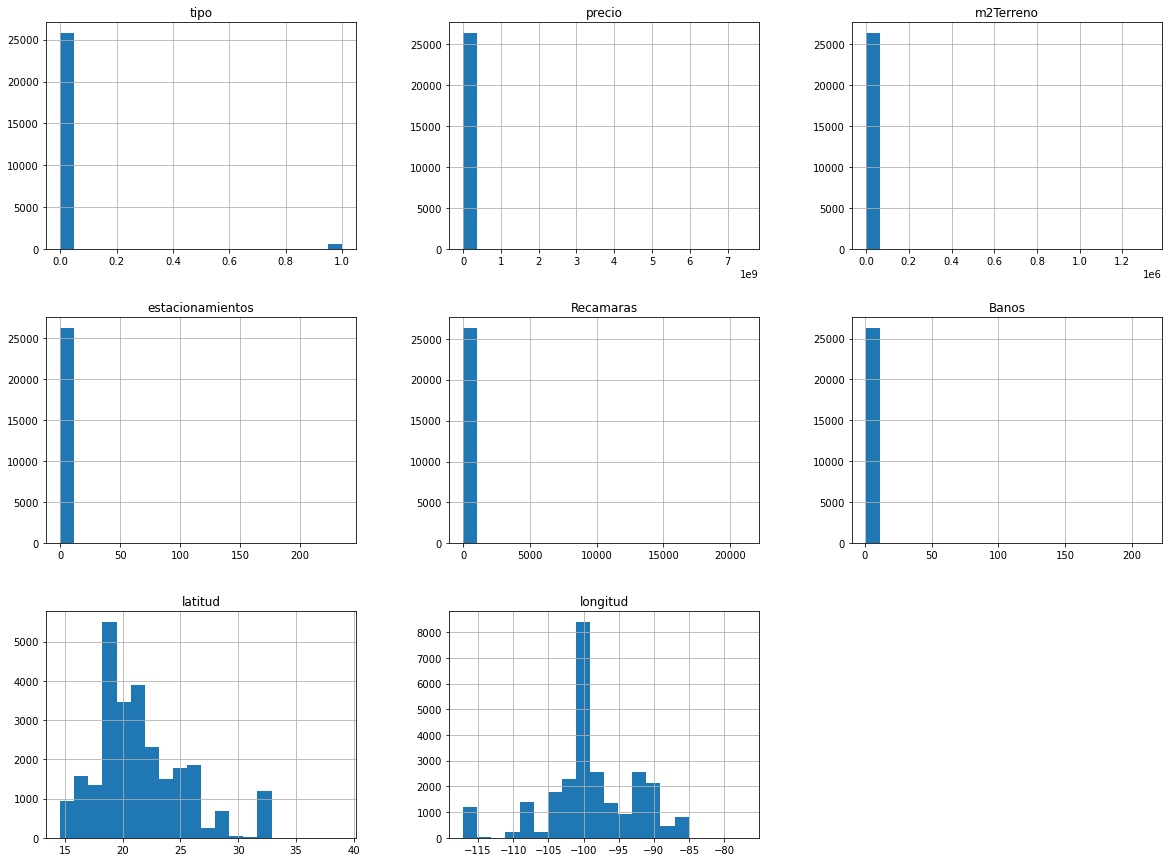

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
data_df.hist(bins=20, figsize=(20,15))
plt.show()

In [44]:
corr_matrix = data_df.corr()
corr_matrix['precio'].sort_values(ascending=False)

precio              1.000000
Banos               0.044294
estacionamientos    0.035351
tipo                0.013173
longitud            0.010739
m2Terreno           0.004809
Recamaras           0.000202
latitud            -0.006800
Name: precio, dtype: float64

In [45]:
# Define target
y = data_df['precio']
# Define features set
X = data_df.drop(columns='precio')

In [46]:
from sklearn import preprocessing

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

In [47]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=1)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21087, 7)
(5272, 7)
(21087,)
(5272,)


In [49]:
from sklearn.preprocessing import StandardScaler
# Create StandardScaler instance
scaler = StandardScaler()
# Fit Standard Scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Creating the decision tree classifier instance
model = RandomForestClassifier(n_estimators=50, random_state=1)

# Fitting the model
model = model.fit(X_train_scaled, y_train)

MemoryError: could not allocate 554303488 bytes

In [ ]:
# Making predictions
predictions = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                               max_iter=500,
                               random_state=1)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred))

MemoryError: Unable to allocate 680. MiB for an array with shape (21087, 4229) and data type int64